## OpenCV影像運算
1. 影像加法運算
2. 影像疊加

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 影像加法運算

在python中影像是存在numpy陣列中，並預設(三通道，8bit位元深度)使用uint8的型態，代表每個陣列中的值為8位元深度(0~255)，若值超過255的上限或是小於0的下限，就會造成溢位。

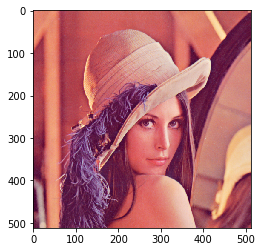

In [3]:
img_BGR_lenna = cv2.imread('data/Lenna.png')
img_RGB_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB_lenna)
plt.show()

In [4]:
# 看看影像numpy陣列的詳細資料
print('img_RGB的型態為:', type(img_RGB_lenna))
print('img_RGB的維度為:', img_RGB_lenna.shape)
print('img_RGB的總元素數量為:', img_RGB_lenna.size)
print('img_RGB的元素型態為:', img_RGB_lenna.dtype)

img_RGB的型態為: <class 'numpy.ndarray'>
img_RGB的維度為: (512, 512, 3)
img_RGB的總元素數量為: 786432
img_RGB的元素型態為: uint8


In [5]:
# 第一個像素點的RGB值
img_RGB_lenna[0][0]

array([226, 137, 125], dtype=uint8)

In [6]:
# 第一個像素點的RGB值 + 50
img_RGB_lenna[0][0] + 50

array([ 20, 187, 175], dtype=uint8)

In [7]:
# 第一個像素點的RGB值 - 150
img_RGB_lenna[0][0] - 150

array([ 76, 243, 231], dtype=uint8)

In [8]:
# 可以理解為對加減完的數值取模(除以256後的餘數)
print('大於255範例 : 226 + 50 ->',(226 + 50) % 256)
print('小於0範例 : 137 - 150 ->',(137 - 150) % 256)
print('0~255之間範例 : 137 + 50 ->',(137 + 50) % 256)

大於255範例 : 226 + 50 -> 20
小於0範例 : 137 - 150 -> 243
0~255之間範例 : 137 + 50 -> 187


>直接對陣列做加減法不會導致數值超過元素型態所規定的上下限而損毀影像。

>算法為: $a+b=mod(a+b, 256) $

>$mod()$為取模函數

原圖-50


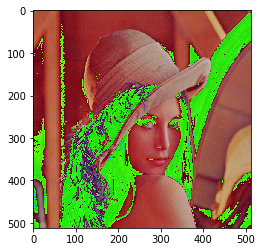

原圖-30


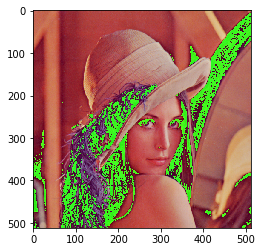

原圖


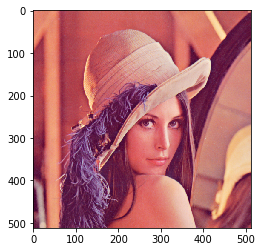

原圖+30


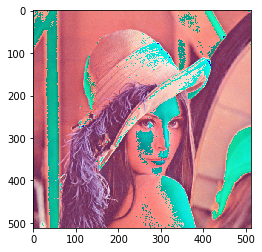

原圖+50


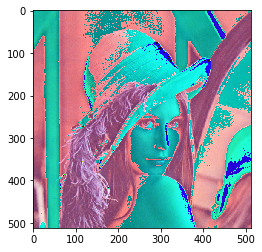

In [9]:
# 將lenna圖加上一個數值後印出
print('原圖-50')
plt.imshow(img_RGB_lenna - 50)
plt.show()
print('原圖-30')
plt.imshow(img_RGB_lenna - 30)
plt.show()
print('原圖')
plt.imshow(img_RGB_lenna)
plt.show()
print('原圖+30')
plt.imshow(img_RGB_lenna + 30)
plt.show()
print('原圖+50')
plt.imshow(img_RGB_lenna + 50)
plt.show()

溢位的特色使得對照片直接做加減會產生類似"破圖"的效果，OpenCV中也有可以對影像做加減法的函式`cv2.add`及`cv2.subtract`。

In [10]:
# 由於cv2.add是兩照片相加，所以先製作一個255*255*3的numpy陣列，其中所有元素皆為1
M = np.ones(img_RGB_lenna.shape, dtype = np.uint8)
img_add_lenna = cv2.add(img_RGB_lenna, M * 50)
img_subtract_lenna = cv2.subtract(img_RGB_lenna, M * 150)

In [11]:
# 第一個像素點的RGB值
img_RGB_lenna[0][0]

array([226, 137, 125], dtype=uint8)

In [12]:
# 第一個像素點的RGB值 + 50
img_add_lenna[0][0]

array([255, 187, 175], dtype=uint8)

In [13]:
# 第一個像素點的RGB值 - 150
img_subtract_lenna[0][0]

array([76,  0,  0], dtype=uint8)

>可以發現使用OpenCV的`cv2.add`及`cv2.subtract`函式計算後數值大於255則設為255；小於0則設為0，不會有溢位狀況。

>算法為: 
$
a+b=\begin{cases}
255,\quad a+b > 255 \\
a+b,\quad 0 \leq a+b\leq 255 \\
0,\quad a+b < 0
\end{cases}
$

原圖-50


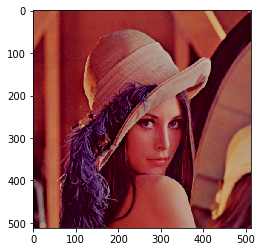

原圖-30


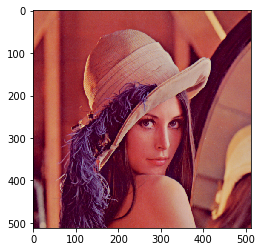

原圖


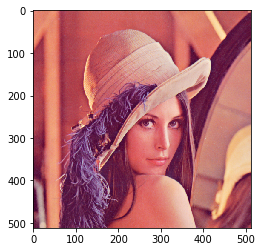

原圖+30


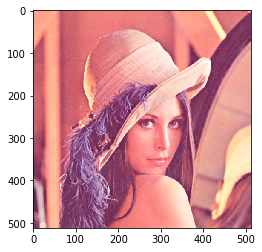

原圖+50


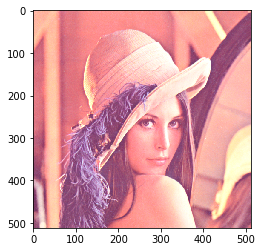

In [14]:
# 將lenna圖加上一個數值後印出
print('原圖-50')
plt.imshow(cv2.subtract(img_RGB_lenna, M * 50))
plt.show()
print('原圖-30')
plt.imshow(cv2.subtract(img_RGB_lenna, M * 30))
plt.show()
print('原圖')
plt.imshow(img_RGB_lenna)
plt.show()
print('原圖+30')
plt.imshow(cv2.add(img_RGB_lenna, M * 30))
plt.show()
print('原圖+50')
plt.imshow(cv2.add(img_RGB_lenna, M * 50))
plt.show()

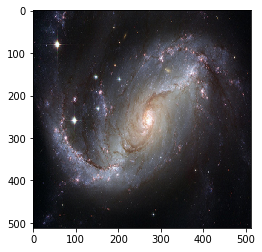

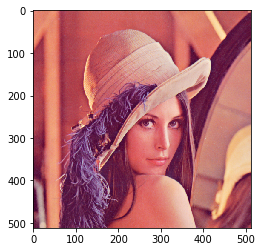

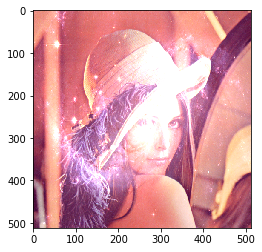

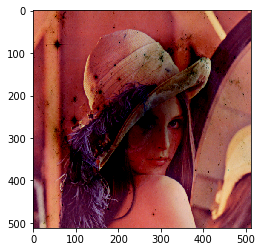

In [15]:
# 兩張圖片相加或相減(兩圖片維度必須一致)
img_BGR_cosmos = cv2.imread('data/cosmos.png')
img_RGB_cosmos = cv2.cvtColor(img_BGR_cosmos, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB_cosmos)
plt.show()
plt.imshow(img_RGB_lenna)
plt.show()
plt.imshow(cv2.add(img_RGB_lenna, img_RGB_cosmos))
plt.show()
plt.imshow(cv2.subtract(img_RGB_lenna, img_RGB_cosmos))
plt.show()

要進行兩圖片疊加還可以使用`cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])`函式，給予兩張圖不同權重再加上常數gamma，組合成新圖。

>算法為: $dst = src1 \times alpha + src2 \times beta + gamma$

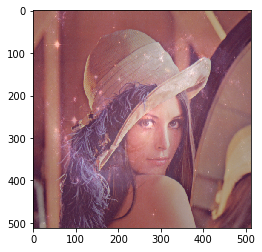

In [16]:
# 兩張圖片加權疊加(兩圖片維度必須一致)
plt.imshow(cv2.addWeighted(img_RGB_lenna, 0.6, img_RGB_cosmos, 0.4, 20))
plt.show()

>使用`cv2.add`做相加是將值直接相加，結果一定比原圖還要大，圖片會變明亮，`cv2.addWeighted`是加權後的結果，每個像素點的值不一定大於原圖，並且加權值可以自訂，也可用常數值gamma進行整體微調(若加上gamma值後超過255，也會被固定為255，不會溢位)。